#### Importing packages

In [ ]:
import pandas as pd
import seaborn as sns
import cufflinks as cf
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def load_data(filename):
    try:
        return pd.read_csv(filename)
    except FileNotFoundError:
        print("File not found file ", filename)
    except PermissionError:
        print("No permission to access file ", filename)
    except Exception as e:
        print("Some generic exception with file ", filename , " error --> ", e)

In [23]:
# Variables declaration
filename = r'C:\Users\abhin\Downloads\UCI_Credit_Card.csv'
categorical_features = ["SEX","EDUCATION","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]

cf.go_offline()
data = load_data(filename)
pd.pandas.set_option('display.max_columns',None)
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### Data analysis

In [24]:
print(data.isna().values.any())

False


###### Validating Values

In [25]:
# The ID column doesn't have any relevance here and each value is unique.
print(data.ID.nunique())
print(data.shape)

30000
(30000, 25)


In [26]:
# LIMIT_BAL has values ranging between 10,000 and 100,000.
print(data.LIMIT_BAL.min(),data.LIMIT_BAL.max())

10000.0 1000000.0


In [27]:
# SEX has only valid values in it
print(data.SEX.value_counts())

SEX
2    18112
1    11888
Name: count, dtype: int64


In [28]:
# EDUCATION has 14 invalid values
print(data.EDUCATION.value_counts().sort_index())

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64


In [29]:
# Marriage has 54 invalid values
print(data.MARRIAGE.value_counts().sort_index())

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64


21 79 35.4855


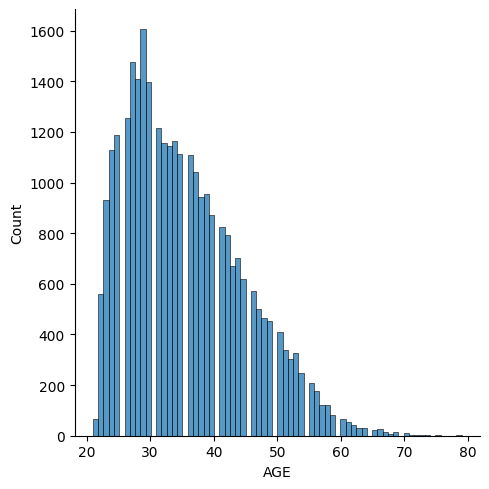

In [30]:
# AGE has
sns.displot(data.AGE)
print(data.AGE.min(), data.AGE.max(), data.AGE.mean())

In [31]:
# 5-number summary of AGE
age_stats = data.AGE.describe()
print(age_stats['min'])
print(age_stats['25%'])
print(age_stats['50%'])
print(age_stats['75%'])
print(age_stats['max'])

21.0
28.0
34.0
41.0
79.0


In [32]:
print(data.PAY_0.value_counts().sort_index())

PAY_0
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: count, dtype: int64


In [33]:
# Dataset is imbalanced
print(data.default.value_counts())

default
0    23364
1     6636
Name: count, dtype: int64
